In [6]:
from utils.analyze import load_data
from utils.analysis import detrend2D, wiener, sensor_function, sample_shape
from utils.plot import plot
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy.ndimage.filters import gaussian_filter
%matplotlib inline

In [2]:
x, y, z, T, t, settings = load_data("height01_1", range(1,21))
x = x[0]
y = y[0]
settings = settings[0]

In [25]:
def cat1d(x):
    x_flat = [xi.flatten() for xi in x]
    return np.concatenate(x_flat)

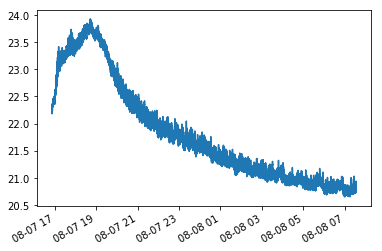

In [26]:
dt = np.array([[datetime.datetime.fromtimestamp(tii) for tii in ti] for ti in t])
plt.plot(cat1d(dt), cat1d(T))
plt.gcf().autofmt_xdate()

In [3]:
sensor = z[9][0]
background1 = z[10][0]
background2 = z[17][0]
background3 = z[18][0]
signal = sensor - background1 
noise = detrend2D(background2 - background3)

(<matplotlib.figure.Figure at 0x7fc549116fd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc549060668>)

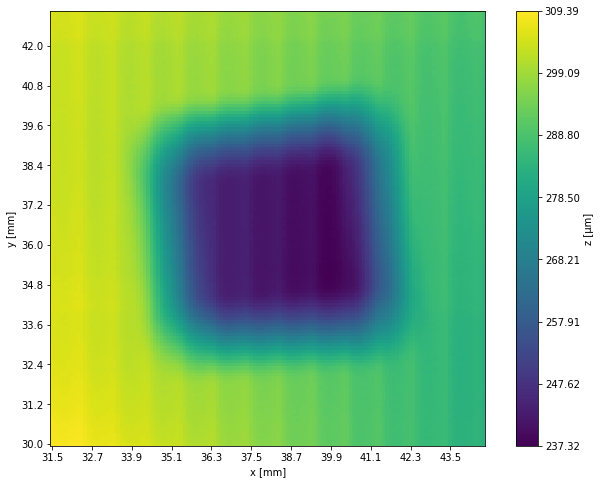

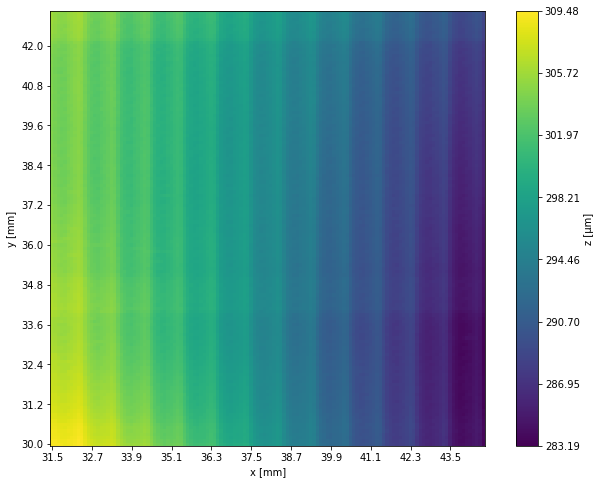

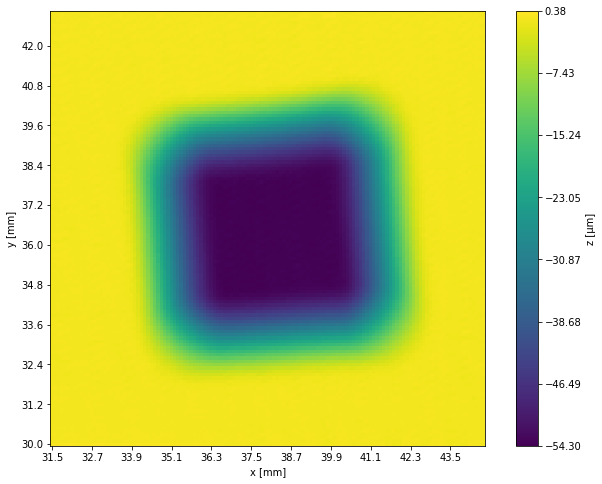

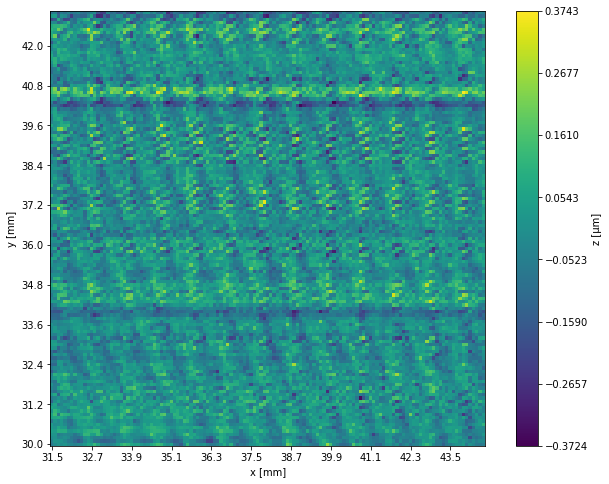

In [24]:
plot(x, y, sensor)
plot(x, y, background1)
plot(x, y, signal)
plot(x, y, noise)

(<matplotlib.figure.Figure at 0x7fc549ab2be0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc549380a20>)

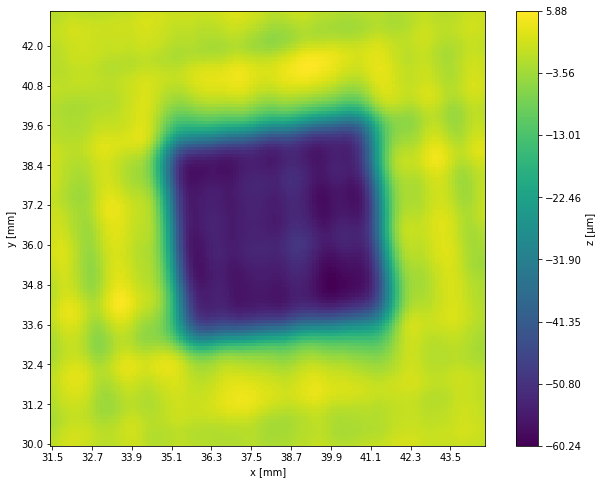

In [23]:
coords = [(35.5, 33.3), (41.6, 34), (41.0, 39.8), (35.0, 39.1)]

diameter = 2.57
sigma = 0.5
stepsize = settings['extent'][0][2]


sample = sample_shape(coords, -0.5, 0, x, y)
#plot(x, y, sample)
kernel = sensor_function(diameter / stepsize, sigma)
z_reconstructed = wiener(signal, kernel, noise, sample)
plot(x, y, z_reconstructed)

In [ ]:
[(35.5, 33.3), (41.6, 33.8), (41.0, 39.8), (35.0, 39.1)]